In [1]:
import pandas as pd
import folium
import numpy as np
import math
# 시각화 라이브러리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
import seaborn as sns
%matplotlib inline

In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
boho_final = pd.read_excel('C:/Users/doong/Desktop/2021-2학기/창종설/boho_final_6.xlsx')

In [55]:
boho_final_6=boho_final.fillna(0)

In [56]:
boho_final_6.drop("Unnamed: 0",axis=1,inplace=True)

In [57]:
boho_final_6

,시설명,시간대구분,주소,시설종류,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,경도,...,중상자수,경상자수,부상신고자수,가해운전자 차종,피해운전자 차종,피해운전자 연령,사고 수,통행량 도로명,통행량,주변보호구역유무
0,GKL행복어린이집,0,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,테헤란로(선릉역),903.858124,1
1,GKL행복어린이집,1,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,테헤란로(선릉역),763.153343,1
2,GKL행복어린이집,2,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,테헤란로(선릉역),641.415858,1
3,GKL행복어린이집,3,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,테헤란로(선릉역),536.548025,1
4,GKL행복어린이집,4,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,테헤란로(선릉역),479.484134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,희망찬유치원,19,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,동소문로(길음교사거리),1320.915761,1
36236,희망찬유치원,20,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,동소문로(길음교사거리),1239.594766,1
36237,희망찬유치원,21,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,동소문로(길음교사거리),1278.748631,1
36238,희망찬유치원,22,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,동소문로(길음교사거리),1184.117704,1


고유벡터법 가중치 산정

In [58]:
boho_final_6["통행량_minmax"]=0
Max=boho_final_6["통행량"].max()
Min=boho_final_6["통행량"].min()
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"통행량_minmax"]=(boho_final_6.loc[i,"통행량"]-Min)/(Max-Min)

In [59]:
boho_final_6["사망자수_minmax"]=0
Max=boho_final_6["사망자수"].max()
Min=boho_final_6["사망자수"].min()
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"사망자수_minmax"]=(boho_final_6.loc[i,"사망자수"]-Min)/(Max-Min)

In [60]:
boho_final_6["중상자수_minmax"]=0
Max=boho_final_6["중상자수"].max()
Min=boho_final_6["중상자수"].min()
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"중상자수_minmax"]=(boho_final_6.loc[i,"중상자수"]-Min)/(Max-Min)

In [61]:
boho_final_6["경상자수_minmax"]=0
Max=boho_final_6["경상자수"].max()
Min=boho_final_6["경상자수"].min()
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"경상자수_minmax"]=(boho_final_6.loc[i,"경상자수"]-Min)/(Max-Min)

In [62]:
boho_final_6["부상신고자수_minmax"]=0
Max=boho_final_6["부상신고자수"].max()
Min=boho_final_6["부상신고자수"].min()
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"부상신고자수_minmax"]=(boho_final_6.loc[i,"부상신고자수"]-Min)/(Max-Min)

In [63]:
boho_final_6["위험도"]=0
for i in range(len(boho_final_6)):
    boho_final_6.loc[i,"위험도"]= (boho_final_6.loc[i,"통행량_minmax"] + boho_final_6.loc[i,"부상신고자수_minmax"]*1.901 + 
                                boho_final_6.loc[i,"경상자수_minmax"] * 3.870 + boho_final_6.loc[i,"중상자수_minmax"] * 7.847 + 
                                boho_final_6.loc[i,"사망자수_minmax"] * 15.390)

In [64]:
boho_final_6["위험도_minmax"]=0
Max=boho_final_6["위험도"].max()
Min=boho_final_6["위험도"].min()

for i in range(len(boho_final_6)):
    boho_final_6.loc[i, "위험도_minmax"] = (boho_final_6.loc[i,"위험도"]-Min)/(Max-Min)

In [65]:
# boho_final_6["1시간 후 위험도_minmax"] = 0
# for i in range(1510):
#     for j in range(24):
#             if j != 23:
#                 boho_final_6.iloc[24*i+j, 34] = boho_final_6.iloc[24*i+j+1, 33]
#             else:
#                 boho_final_6.iloc[24*i+j, 34] = boho_final_6.iloc[24*i+j-23, 33]

In [66]:
boho_final_6

,시설명,시간대구분,주소,시설종류,구역지정수,CCTV 수,도로표지판 수,과속방지턱 수,위도,경도,...,통행량 도로명,통행량,주변보호구역유무,통행량_minmax,사망자수_minmax,중상자수_minmax,경상자수_minmax,부상신고자수_minmax,위험도,위험도_minmax
0,GKL행복어린이집,0,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,테헤란로(선릉역),903.858124,1,0.123785,0,0.0,0.0,0.0,0.123785,0.006574
1,GKL행복어린이집,1,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,테헤란로(선릉역),763.153343,1,0.104175,0,0.0,0.0,0.0,0.104175,0.005532
2,GKL행복어린이집,2,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,테헤란로(선릉역),641.415858,1,0.087208,0,0.0,0.0,0.0,0.087208,0.004631
3,GKL행복어린이집,3,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,테헤란로(선릉역),536.548025,1,0.072593,0,0.0,0.0,0.0,0.072593,0.003855
4,GKL행복어린이집,4,서울특별시 강남구 삼성로122길 7 (삼성동),어린이집,1,0,12.0,0,37.510432,127.051243,...,테헤란로(선릉역),479.484134,1,0.064640,0,0.0,0.0,0.0,0.064640,0.003433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36235,희망찬유치원,19,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,동소문로(길음교사거리),1320.915761,1,0.181911,0,0.0,0.0,0.0,0.181911,0.009661
36236,희망찬유치원,20,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,동소문로(길음교사거리),1239.594766,1,0.170577,0,0.0,0.0,0.0,0.170577,0.009059
36237,희망찬유치원,21,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,동소문로(길음교사거리),1278.748631,1,0.176034,0,0.0,0.0,0.0,0.176034,0.009349
36238,희망찬유치원,22,"서울특별시 성북구 동소문로34길 24 (돈암동, 삼성아파트)",유치원(일반),1,0,10.0,12,37.598991,127.023142,...,동소문로(길음교사거리),1184.117704,1,0.162845,0,0.0,0.0,0.0,0.162845,0.008648


In [67]:
boho_final = boho_final_6

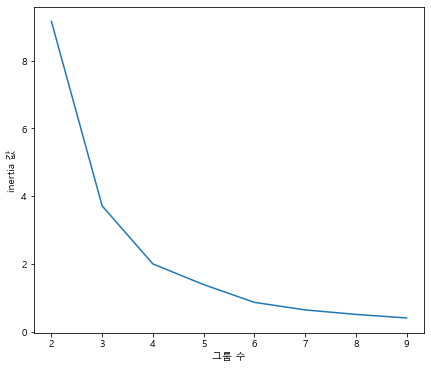

In [83]:
## k-means clustering
from sklearn.cluster import KMeans

X = boho_final[["위험도_minmax"]]
X_train = pd.get_dummies(X)
model = KMeans(n_clusters=3, random_state=0)
model.fit(X)
y_pred = model.labels_
boho_final['cluster_label'] = y_pred

inertia_list = []
k_list = range(2,10)
for k in k_list:
    model = KMeans(n_clusters=k)
    model.fit(X)
    inertia_list.append(model.inertia_)
plt.figure(figsize=(7,6))
plt.plot(k_list, inertia_list)
plt.xlabel("그룹 수")
plt.ylabel("inertia 값")
plt.show()

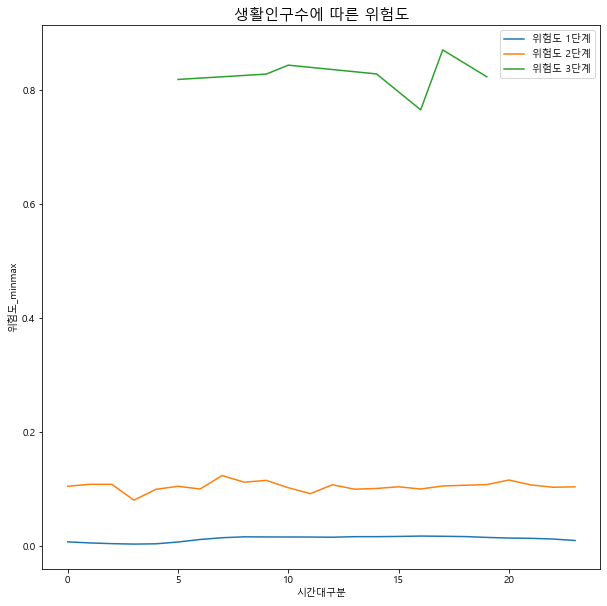

In [84]:
plt.figure(figsize=(10,10))
sns.lineplot(data=boho_final[boho_final['cluster_label']==0], x="시간대구분", y="위험도_minmax", ci=None, label='위험도 1단계')
sns.lineplot(data=boho_final[boho_final['cluster_label']==1], x="시간대구분", y="위험도_minmax", ci=None, label='위험도 2단계')
sns.lineplot(data=boho_final[boho_final['cluster_label']==2], x="시간대구분", y="위험도_minmax", ci=None, label='위험도 3단계')
# sns.lineplot(data=boho_final[boho_final['cluster_label']==3], x="시간대구분", y="위험도_minmax", ci=None, label='위험도 4단계')
# sns.lineplot(data=boho_final[boho_final['cluster_label']==4], x="시간대구분", y="위험도_minmax", ci=None, label='위험도 5단계')
# sns.lineplot(data=boho_final[boho_final['cluster_label']==5], x="인구밀도", y="위험도_minmax", ci=None, label='위험도 5단계')
plt.title("생활인구수에 따른 위험도", fontdict={'fontsize':15})
plt.legend()
plt.show()

In [85]:
boho_final["cluster_label"].value_counts()

0    35584
1      644
2       12
Name: cluster_label, dtype: int64

In [86]:
# 파생변수 만들기
# 오전/오후 시간대 여부
boho_final["오전/오후"] = boho_final["시간대구분"].apply(lambda x: 1 if(12<=x<=23) else 0)
# 등하교 시간대 여부
boho_final["등하교시간"] = boho_final["시간대구분"].apply(lambda x: 1 if (7<= x <= 9) or (15 <= x <= 17) else 0)
# 점심시간 유무
boho_final["점심시간"] = boho_final["시간대구분"].apply(lambda x: 1 if (12<= x <= 13) else 0)
# 속도 30 이상 유무
boho_final["속도 30이상"] = boho_final["속도"].apply(lambda x : 1 if ( 30 < x) else 0)
# 속도 20 초과 30 이하 유무
boho_final["속도 20이상"] = boho_final["속도"].apply(lambda x : 1 if ( 20 < x <= 30) else 0)
# 속도 15 초과 20 이하 유무
boho_final["속도 15이상"] = boho_final["속도"].apply(lambda x : 1 if ( 15 < x <= 20) else 0)
# CCTV 수
boho_final["CCTV 수_파생"] = boho_final["CCTV 수"].apply(lambda x : 1 if( 3.5 <= x) else 0)
# 도로표지판 수
boho_final["도로표지판 수_파생"] = boho_final["도로표지판 수"].apply(lambda x : 1 if( 8.012 <= x) else 0)
# 과속방지턱 수
boho_final["과속방지턱 수_파생"] = boho_final["과속방지턱 수"].apply(lambda x : 1 if( 43.5 <= x) else 0)
# 보호구역도로폭 수
boho_final["보호구역도로폭_파생"] = boho_final["보호구역도로폭"].apply(lambda x : 1 if( 7.9 <= x) else 0)
# 피해운전자 차종
boho_final["피해운전자 차종_파생"] = boho_final["피해운전자 차종"].apply(lambda x : 1 if( 6.021 <= x) else 0)
# 가해운전자 차종1
boho_final["가해운전자 차종_파생"] = boho_final["가해운전자 차종"].apply(lambda x : 1 if( 3.973 <= x) else 0)
# 피해운전자 연령1
boho_final["피해운전자 연령_파생"] = boho_final["피해운전자 연령"].apply(lambda x : 1 if( 13.333 <= x) else 0)
# 구역지정수
boho_final["구역지정수_파생"] = boho_final["구역지정수"].apply(lambda x : 1 if( 2.5 <= x) else 0)

In [ ]:
boho_final.keys()

Index(['시설명', '시간대구분', '주소', '시설종류', '구역지정수', 'CCTV 수', '도로표지판 수', '과속방지턱 수',
       '위도', '경도', 'CCTV설치여부', '보호구역도로폭', 'tmp', '속도', '도로명', '행정동', '시군구명',
       '총생활인구수', '사망자수', '중상자수', '경상자수', '부상신고자수', '가해운전자 차종', '피해운전자 차종',
       '피해운전자 연령', '사고 수', '통행량 도로명', '통행량', '주변보호구역유무', '통행량_minmax',
       '사망자수_minmax', '중상자수_minmax', '경상자수_minmax', '부상신고자수_minmax', '위험도',
       '위험도_minmax', 'cluster_label', '오전/오후', '등하교시간', '점심시간', '속도 30이상',
       '속도 20이상', '속도 15이상', 'CCTV 수_파생', '도로표지판 수_파생', '과속방지턱 수_파생',
       '보호구역도로폭_파생', '피해운전자 차종_파생', '가해운전자 차종_파생', '피해운전자 연령_파생', '구역지정수_파생'],
      dtype='object')

In [87]:
boho_final.to_excel("boho_final(클러스터링).xlsx")